In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import arrow

In [3]:
# Read the close price
rootPath = '../../'
closePrice = pd.read_csv(rootPath + '#.*', sep="\t", header=0, skiprows=1, 
                         index_col=0, parse_dates=True, 
                         date_parser=lambda dates: pd.datetime.strptime(dates, '%Y%m%d'))
closePrice = closePrice.dropna(axis=1, how='all')
closePriceIndex = list(closePrice.index)

In [4]:
def backtest(spname):
    """Read the stock pool, returns the rate of return and the corresponding date."""
    # read the stock pool
    sp = pd.read_csv(rootPath + spname, sep='\t', skiprows=1, header=None, prefix='S')
    sp = sp.dropna(axis=1, how='all')
    sp.S0 = sp.S0.apply(lambda y: str(y)[:4] + '-' + str(y)[4:])
    
    # the rate of return and the corresponding date
    dateList = []
    returnList = []
    for effectDate in range(len(sp.index)):
        spx = sp.iloc[effectDate]
        spx = spx.dropna()
        datex = spx[0]
        lsx = list(spx[1:])
        tmp = closePrice.loc[datex, lsx]
        i = closePriceIndex[closePriceIndex.index(tmp.index[0]) - 1]
        j = tmp.index[-1]
        tmp = closePrice.loc[i:j, lsx]
        tmpIndex = list(tmp.index)
        dateList.extend(tmpIndex)
        for n in range(len(tmpIndex)):
            if len(spx) > 1 & n >= 1:
                returns = np.mean((tmp.iloc[n] - tmp.iloc[n-1]) / tmp.iloc[n-1])
                returnList.extend([returns])
            else:
                returnList.extend([0])

    period = len(dateList)
    returnValues = np.array(returnList) + 1
    returnArray = returnValues.copy()
    for x in range(1, period):
        returnArray[x] = np.prod(returnValues[:x + 1])
    
    return dateList, returnArray

In [6]:
# spName1 = 'SP_V2_V19_Index1_MP1_Set1_201502-201802.txt'
# spName2 = 'SP_V2_V19_Index2_MP1_Set1_201502-201802.txt'
spName3 = 'SP_V2_V22_Index1_MP1_Set1_201502-201802.txt'
# spName4 = 'SP_V2_V22_Index2_MP1_Set1_201502-201802.txt'
spName5 = 'SP_V2_V22_Index1_MP1_Set2_201502-201802.txt'
spName6 = 'SP_V2_V22_Index1_MP1_Set3_201502-201802.txt'

# dateList1, returnArray1 = backtest(spName1)
# dateList2, returnArray2 = backtest(spName2)
dateList3, returnArray3 = backtest(spName3)
# dateList4, returnArray4 = backtest(spName4)
dateList5, returnArray5 = backtest(spName5)
dateList6, returnArray6 = backtest(spName6)

# revenue1 = (returnArray1[-1] ** (250 / (len(dateList1) - 1))) - 1
# revenue2 = (returnArray2[-1] ** (250 / (len(dateList2) - 1))) - 1
revenue3 = (returnArray3[-1] ** (250 / (len(dateList3) - 1))) - 1
# revenue4 = (returnArray4[-1] ** (250 / (len(dateList4) - 1))) - 1
revenue5 = (returnArray5[-1] ** (250 / (len(dateList5) - 1))) - 1
revenue6 = (returnArray6[-1] ** (250 / (len(dateList6) - 1))) - 1

# print(spName1, '年化收益率：' + str(revenue1 * 100) + '%')
# print(spName2, '年化收益率：' + str(revenue2 * 100) + '%')
print(spName3, '年化收益率：' + str(revenue3 * 100) + '%')
# print(spName4, '年化收益率：' + str(revenue4 * 100) + '%')
print(spName5, '年化收益率：' + str(revenue5 * 100) + '%')
print(spName6, '年化收益率：' + str(revenue6 * 100) + '%')

SP_V2_V22_Index1_MP1_Set1_201502-201802.txt 年化收益率：40.0601549476%
SP_V2_V22_Index1_MP1_Set2_201502-201802.txt 年化收益率：39.5155214138%
SP_V2_V22_Index1_MP1_Set3_201502-201802.txt 年化收益率：34.689161318%


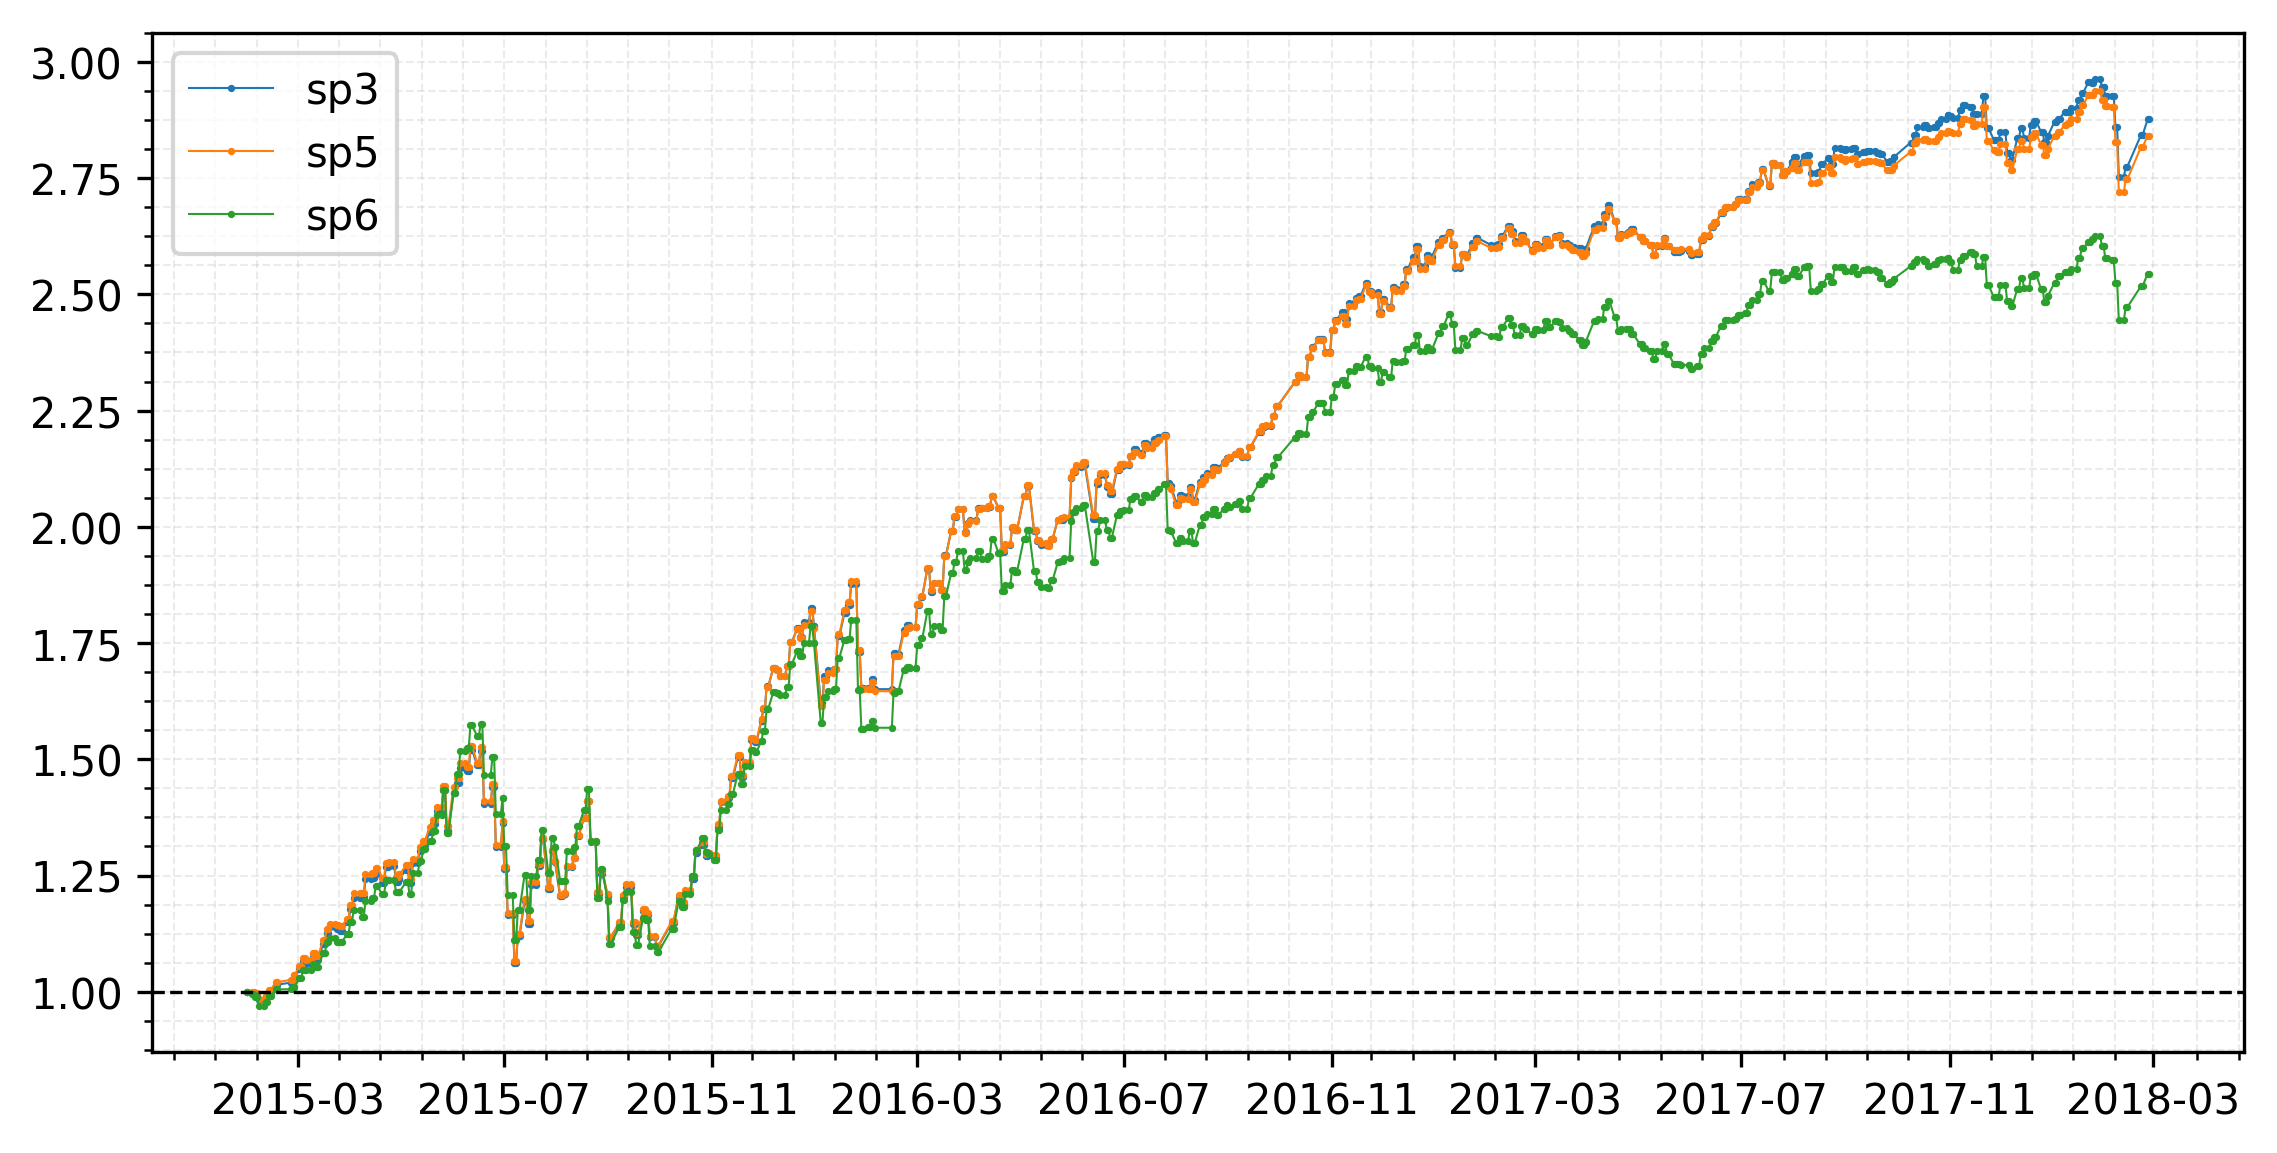

In [7]:
plt.figure(figsize=(9, 4.5), dpi=300)

# plt.plot_date(dateList1, returnArray1, label='sp1', marker='.', markersize=1.5, ls='-', lw=0.5)
# plt.plot_date(dateList2, returnArray2, label='sp2', marker='.', markersize=1.5, ls='-', lw=0.5)
plt.plot_date(dateList3, returnArray3, label='sp3', marker='.', markersize=1.5, ls='-', lw=0.5)
# plt.plot_date(dateList4, returnArray4, label='sp4', marker='.', markersize=1.5, ls='-', lw=0.5)
plt.plot_date(dateList5, returnArray5, label='sp5', marker='.', markersize=1.5, ls='-', lw=0.5)
plt.plot_date(dateList6, returnArray6, label='sp6', marker='.', markersize=1.5, ls='-', lw=0.5)

plt.minorticks_on()
plt.grid(which='both', ls='--', alpha=0.25, lw=0.5)
plt.legend()
plt.axhline(y=1, color='black', lw=0.8, ls='--')

plt.show()